In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import pickle
import numpy as np
import random
from tqdm import tqdm

In [2]:
data_set_dir = 'Face Mask Dataset'
train_data_dir = os.path.join(data_set_dir, 'Train' )
test_data_dir = os.path.join(data_set_dir, "Test")
validation_data_dir = os.path.join(data_set_dir, "Validation")

In [3]:
CATEGORIES = []
for i in os.listdir(train_data_dir):
  CATEGORIES.append(i)
print(CATEGORIES)

['WithMask', 'WithoutMask']


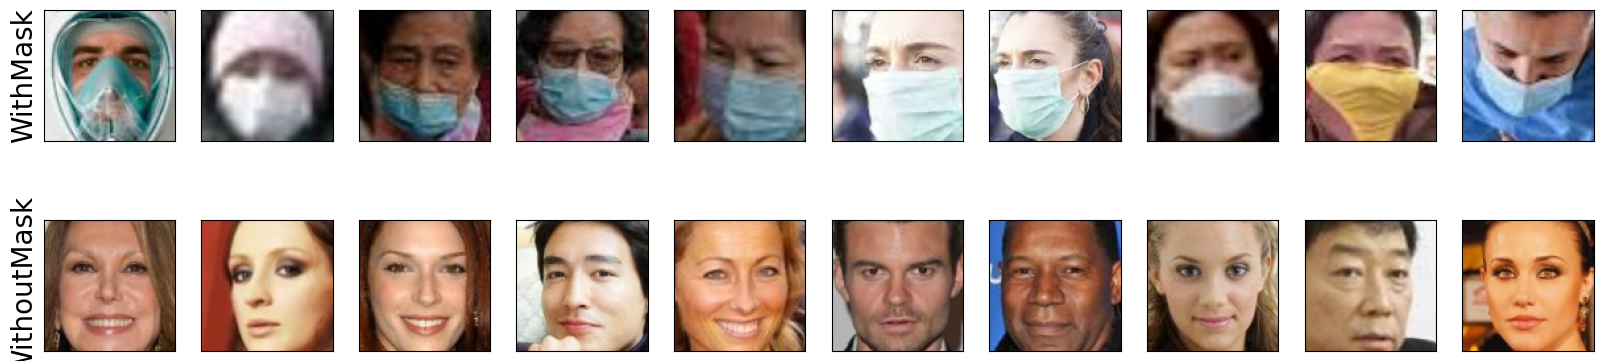

In [4]:

i = 0
plt.figure(figsize=(20,5))
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    plt.subplot(2,10,i+1)
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (100,100))
    # img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BRG2RGB)
    plt.imshow(img_arr)
    if i%10 ==0:
      plt.ylabel(c, size=20)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i%10 == 0:
      break

plt.show()

In [5]:
def getData(dir, categories, img_size=100):
    data = []
    for c in categories:
        path = os.path.join(dir,c)
        for img in tqdm(os.listdir(path)):
            img_arr = plt.imread(os.path.join(path,img))
            img_arr = cv2.resize(img_arr, (img_size,img_size))
            data.append([img_arr, categories.index(c)])
    return data
            

In [6]:
train_data = getData(train_data_dir, CATEGORIES, 100)

valid_data = getData(validation_data_dir, CATEGORIES, 100)

test_data = getData(test_data_dir, CATEGORIES, 100)


  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 509/509 [00:00<00:00, 572.77it/s]


In [7]:
print(len(train_data))
print(len(valid_data))
print(len(test_data))

10000
800
992


In [8]:
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(valid_data)

In [9]:
def get_x_y(data):
    x_data = []
    y_data = []
    i = 0
    for img, label in tqdm(data):
        x_data.append(img)
        y_data.append(label)
    x_data = (np.array(x_data)*255).astype('float32').reshape(-1,100,100,3)
    y_data = np.array(y_data)
    return x_data, y_data

In [10]:
X_train, Y_train = get_x_y(train_data)

X_valid, Y_valid = get_x_y(valid_data)

X_test, Y_test = get_x_y(test_data)


100%|██████████| 992/992 [00:00<00:00, 990890.59it/s]


In [11]:
print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)
print(X_test.shape, Y_test.shape)

(10000, 100, 100, 3) (10000,)
(800, 100, 100, 3) (800,)
(992, 100, 100, 3) (992,)


In [12]:
fileObj = open("Pickle data/X_train", 'wb')
pickle.dump(X_train, fileObj)
fileObj.close()

fileObj = open("Pickle data/Y_train", 'wb')
pickle.dump(Y_train, fileObj)
fileObj.close()

fileObj = open("Pickle data/X_valid", 'wb')
pickle.dump(X_valid, fileObj)
fileObj.close()

fileObj = open("Pickle data/Y_valid", 'wb')
pickle.dump(Y_valid, fileObj)
fileObj.close()

fileObj = open("Pickle data/X_test", 'wb')
pickle.dump(X_test, fileObj)
fileObj.close()

fileObj = open("Pickle data/Y_test", 'wb')
pickle.dump(Y_test, fileObj)
fileObj.close()
